In [1]:
import os
import pandas as pd

In [2]:
data = pd.read_csv('1sf2mERLTmuH9phES65rBw_a8f877dcd6d84ca3b48e8390d40c74f1_Ordenes_productos_C1_M2.csv', sep=';', encoding='latin1')

In [3]:
data

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52435,Mallama,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29
3,52187PA10A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,52435,Mallama,Nariño,Electrodomésticos,10,1,6,734,46,48,22
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10129,31875PR37A,A,PR37,VE7960,01/04/2018 11:38,101.93,8.13,81001,Arauca,Arauca,Frutas y verduras,31,34,31,917,3,2,22
10130,99200PQ30A,A,PQ30,VE7623,21/10/2017 17:09,22.17,8.68,17001,Manizales,Caldas,Lácteos,40,7,28,574,3,23,28
10131,3501PF71A,A,PF71,VE3482,10/10/2017 08:37,192.15,22.32,8001,Barranquilla,Atlantico,Muebles,30,24,13,1198,24,13,24
10132,97000PI21A,A,PI21,VE5346,13/11/2017 03:20,4.23,6.98,5001,Medellin,Antioquia,Juguetes,33,1,1,184,34,25,30


# Tablas de Frecuencia

In [4]:
frec_data = data['nombre_categoria_producto'].value_counts().reset_index()
frec_data.rename(columns={'nombre_categoria_producto': 'index', 'count': 'nombre_categoria_producto'}, inplace=True)
frec_data.set_index('index', inplace=True)
frec_data.reset_index()

,index,nombre_categoria_producto
0,Tecnología,543
1,Deportes,537
2,Frutas y verduras,532
3,Carnicería,523
4,Ropa de adultos,521
5,Ferretería,519
6,Juguetes,519
7,Ropa infantil,512
8,Electrodomésticos,510
9,Dormitorio,509


In [5]:
frec_data['porcentaje_nome_categoria_producto'] = frec_data['nombre_categoria_producto'].apply(lambda x: x/frec_data['nombre_categoria_producto'].sum())

In [6]:
frec_data

,nombre_categoria_producto,porcentaje_nome_categoria_producto
index,,
Tecnología,543,0.053582
Deportes,537,0.052990
Frutas y verduras,532,0.052497
Carnicería,523,0.051608
Ropa de adultos,521,0.051411
Ferretería,519,0.051214
Juguetes,519,0.051214
Ropa infantil,512,0.050523
Electrodomésticos,510,0.050326


In [7]:
frec_data['acumilada_nombre_categoria_producto'] = frec_data['nombre_categoria_producto'].cumsum()
frec_data['acumilada_porcentaje_nombre_categoria_producto'] = frec_data['porcentaje_nome_categoria_producto'].cumsum()
frec_data.head(10)

,nombre_categoria_producto,porcentaje_nome_categoria_producto,acumilada_nombre_categoria_producto,acumilada_porcentaje_nombre_categoria_producto
index,,,,
Tecnología,543,0.053582,543,0.053582
Deportes,537,0.052990,1080,0.106572
Frutas y verduras,532,0.052497,1612,0.159068
Carnicería,523,0.051608,2135,0.210677
Ropa de adultos,521,0.051411,2656,0.262088
Ferretería,519,0.051214,3175,0.313302
Juguetes,519,0.051214,3694,0.364515
Ropa infantil,512,0.050523,4206,0.415038
Electrodomésticos,510,0.050326,4716,0.465364


In [8]:
data['peso_g_producto'].quantile([0.25, 0.5, 0.75])

0.25     607.0
0.50    1458.5
0.75    2941.0
Name: peso_g_producto, dtype: float64

In [41]:
listing = pd.read_excel('zWFyatkpQgWhcmrZKSIFDw_4743be8d1e1549b28060905e4a4c24f1_listings_m.xlsx')

In [10]:
listing.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210409161549,2021-04-12,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.90
1,20168,https://www.airbnb.com/rooms/20168,20210409161549,2021-04-12,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.50
2,25428,https://www.airbnb.com/rooms/25428,20210409161549,2021-04-11,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20210409161549,2021-04-11,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,0363 974D 4986 7411 88D8,t,1,0,1,0,1.94
4,28871,https://www.airbnb.com/rooms/28871,20210409161549,2021-04-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.59


In [11]:
listing['review_scores_rating'].describe()

count    15187.000000
mean        95.061500
std          7.192617
min         20.000000
25%         93.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [12]:
listing['review_scores_rating'].quantile([0.25, 0.53, 0.75])

0.25     93.0
0.53     97.0
0.75    100.0
Name: review_scores_rating, dtype: float64

In [13]:
listing['price']
price = listing['price']
price

0         59
1        200
2        125
3        141
4         75
        ... 
17820     47
17821    200
17822    112
17823    107
17824     94
Name: price, Length: 17825, dtype: int64

In [14]:
price_df = pd.DataFrame(price)

In [15]:
price_df

,price
0,59
1,200
2,125
3,141
4,75
...,...
17820,47
17821,200
17822,112
17823,107


In [16]:
price_df[price_df['price'] == 0]

,price
16625,0
16627,0
16628,0
16798,0
16803,0
16804,0
16811,0
16812,0
16813,0
16829,0


In [17]:
# Drop rows with price = 0
price_df = price_df[price_df['price'] != 0]


In [18]:
# Prices with prices below 78% quantile
price_df = price_df[price_df['price'] < price_df['price'].quantile(0.22)]
MEAN_PRICE = price_df['price'].mean()
MEAN_PRICE

66.38708820403826

In [19]:
promedio = price_df['price'].mean()
prices_below_mean = price_df[price_df['price'] < promedio]  

amount_porcent = prices_below_mean['price'].count() / price_df['price'].count()
amount_porcent

0.42853347502656747

In [20]:
# Calcular la media de los precios
mean = price_df['price'].mean()

# Calcular la mediana de los precios
median = price_df['price'].median()

# Calcular la desviación estándar de los precios
std = price_df['price'].std()


In [21]:
mean, median, std   

(66.38708820403826, 70.0, 16.582258676470204)

In [22]:
(mean + 100)/std


10.034042493869501

In [23]:
import plotly.express as px

In [24]:
data

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52435,Mallama,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29
3,52187PA10A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,52435,Mallama,Nariño,Electrodomésticos,10,1,6,734,46,48,22
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10129,31875PR37A,A,PR37,VE7960,01/04/2018 11:38,101.93,8.13,81001,Arauca,Arauca,Frutas y verduras,31,34,31,917,3,2,22
10130,99200PQ30A,A,PQ30,VE7623,21/10/2017 17:09,22.17,8.68,17001,Manizales,Caldas,Lácteos,40,7,28,574,3,23,28
10131,3501PF71A,A,PF71,VE3482,10/10/2017 08:37,192.15,22.32,8001,Barranquilla,Atlantico,Muebles,30,24,13,1198,24,13,24
10132,97000PI21A,A,PI21,VE5346,13/11/2017 03:20,4.23,6.98,5001,Medellin,Antioquia,Juguetes,33,1,1,184,34,25,30


In [25]:
data_estado = data['departamento_vendedor'].value_counts().reset_index()
data_estado.columns = ['departamento_vendedor', 'count']
fig = px.bar(data_estado, x='departamento_vendedor', y='count', title='Cantidad de productos por departamento')
fig.show()

In [33]:
data_product = data.groupby(['departamento_vendedor', 'nombre_categoria_producto']).count().reset_index()[['orden_id', 'departamento_vendedor', 'nombre_categoria_producto']]

data_product.rename(columns={'orden_id': 'count'}, inplace=True)
data_product = data_product[data_product['nombre_categoria_producto'] == "Celulares"]

fig = px.bar(data_product, x='nombre_categoria_producto', y='count', color='departamento_vendedor', title='Cantidad de productos por departamento y categoría', barmode='group')
fig.show()

In [42]:
room_type = listing['room_type'].value_counts().reset_index()
room_type.columns = ['room_type', 'count']

In [43]:
room_type

,room_type,count
0,Entire home/apt,13896
1,Private room,3756
2,Hotel room,124
3,Shared room,49


In [44]:
fig = px.bar(room_type, y='count', x='room_type', title='Porcentaje de tipos de habitaciones')
fig.show()

In [45]:
# Discretizar la variable "price" en dos grupos
listing['price_group'] = pd.cut(listing['price'], bins=[-float('inf'), 130, float('inf')], labels=['< 130', '>= 130'])

# Mostrar la distribución de los grupos para verificar la discretización
listing['price_group'].value_counts()


price_group
< 130     9369
>= 130    8456
Name: count, dtype: int64

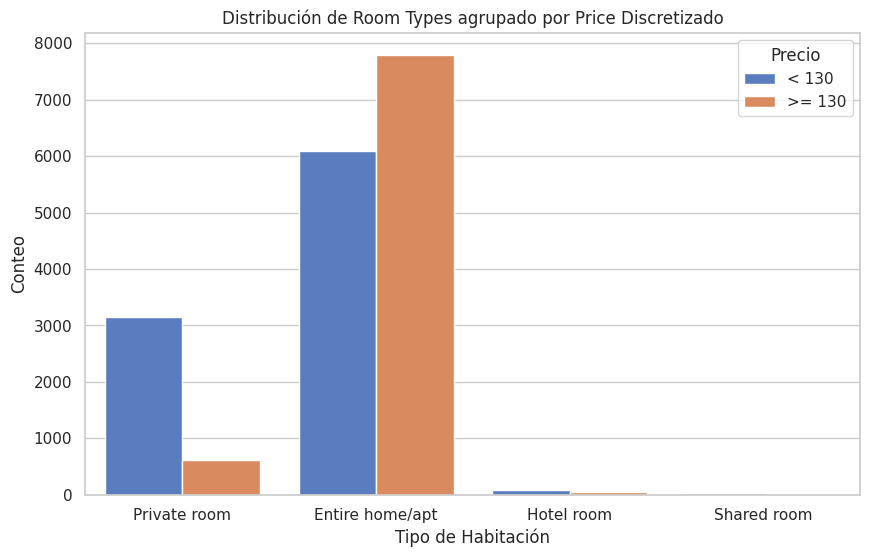

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=listing, x='room_type', hue='price_group', palette='muted')

# Configurar los títulos y etiquetas
plt.title('Distribución de Room Types agrupado por Price Discretizado')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Conteo')
plt.legend(title='Precio')

# Mostrar el gráfico
plt.show()
